In [11]:
import torch
import sys
new_path = 'third_part/beats'
sys.path.append(new_path)
from Tokenizers import TokenizersConfig, Tokenizers

# load the pre-trained checkpoints
checkpoint = torch.load('Tokenizer_iter3_plus_AS2M.pt')

cfg = TokenizersConfig(checkpoint['cfg'])
BEATs_tokenizer = Tokenizers(cfg)
BEATs_tokenizer.load_state_dict(checkpoint['model'])
BEATs_tokenizer.eval()

# tokenize the audio and generate the labels
audio_input_16khz = torch.randn(1, 10400)
padding_mask = torch.zeros(1, 10200).bool()

labels = BEATs_tokenizer.extract_labels(audio_input_16khz, padding_mask=padding_mask)

torch.Size([1, 10400])
torch.Size([63, 128])
torch.Size([1, 63, 128])
torch.Size([1, 24, 768])


In [15]:
import torch
from BEATs import BEATs, BEATsConfig

# load the pre-trained checkpoints
checkpoint = torch.load('BEATs_iter3_plus_AS2M.pt')

cfg = BEATsConfig(checkpoint['cfg'])
BEATs_model = BEATs(cfg)
BEATs_model.load_state_dict(checkpoint['model'])
BEATs_model.eval()

# extract the the audio representation
audio_input_16khz = torch.randn(1, 16384)
padding_mask = torch.zeros(1, 16384).bool()

representation = BEATs_model.extract_features(audio_input_16khz, padding_mask=padding_mask)[0]

In [16]:
representation.shape

torch.Size([1, 48, 768])

In [17]:
import matplotlib.pyplot as plt

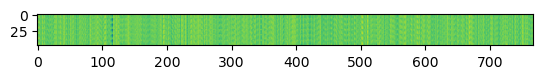

In [19]:
plt.imshow(representation[0].detach().numpy())
plt.show()